In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
pd.set_option("max_columns", None)


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Soni\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
reviews = pd.read_csv("reviews.csv")
listings = pd.read_csv("listings.csv")

In [4]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [4]:
from __future__ import print_function
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in reviews['comments'].values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}:{1},'.format(k,ss[k]),end = ' ')
    print()

Cute and cozy place. Perfect location to everything! 
compound:0.7901, neg:0.0, neu:0.462, pos:0.538, 
Kelly has a great room in a very central location. 
Beautiful building , architecture and a style that we really like. 
We felt guite at home here and wish we had spent more time.
Went for a walk and found Seattle Center with a major food festival in progress. What a treat.
Visited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW.  Thanks for a great stay.
compound:0.9872, neg:0.0, neu:0.609, pos:0.391, 
Very spacious apartment, and in a great neighborhood.  This is the kind of apartment I wish I had!

Didn't really get to meet Kelly until I was on my out, but she was always readily available by phone. 

I believe the only "issue" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday
compound:0.8718, neg:0.043, neu:0.772, pos:0.185, 
Close to Seattle Center and

In [5]:
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [6]:
reviews_f = [r for r in reviews['comments'] if pd.notnull(r) and get_language(r) == 'english']

C:\Users\Soni\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  app.launch_new_instance()


In [7]:
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

In [8]:
scored_reviews = pd.DataFrame()
scored_reviews['review'] = [r for r in reviews_f if get_language(r) == 'english']
scored_reviews['compound'] = [score['compound'] for score in pscores]
scored_reviews['negativity'] = [score['neg'] for score in pscores]
scored_reviews['neutrality'] = [score['neu'] for score in pscores]
scored_reviews['positivity'] = [score['pos'] for score in pscores]

C:\Users\Soni\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  app.launch_new_instance()


In [9]:
review_w_score = scored_reviews.join(reviews, how='inner', lsuffix='review', rsuffix='comments', sort=False).iloc[:,:-1]

In [10]:
listings.rename(columns={'id':'listing_id'}, inplace=True)

In [11]:
# joined_table = (listings.join(review_w_score, how='inner', on ='listing_id', lsuffix='left.', rsuffix='right.', sort=True))

joined_table = listings.merge(review_w_score, how='inner', on='listing_id',
                sort=False, suffixes=('_x', '_y'), copy=True)

In [ ]:
# joined_table.to_csv('joined_table.csv', sep=',')
# review_w_score.to_csv('review_w_score.csv', sep=',')

In [ ]:
##Data Pre-Processing starts here

In [12]:
features = joined_table[['neighbourhood_group', 'neighbourhood', 'room_type','compound','negativity','neutrality','positivity', 
                     'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'price', 'calculated_host_listings_count', 'availability_365'
                     ]]

In [13]:
for categorical_feature in ['neighbourhood_group', 'neighbourhood','room_type']:
    features = pd.concat([features, pd.get_dummies(joined_table[categorical_feature],drop_first=True)], axis=1)

In [14]:
#Number of features that can be removed because cosntant value throughout
len(features.columns.tolist()) - len((features.loc[:,features.apply(pd.Series.nunique) != 1]).columns.tolist())

0

In [15]:
for col in features.columns[features.isnull().any()]:
    print(col)

In [16]:
for col in features.columns[features.isnull().any()]:
    features[col] = features[col].fillna(features[col].median())

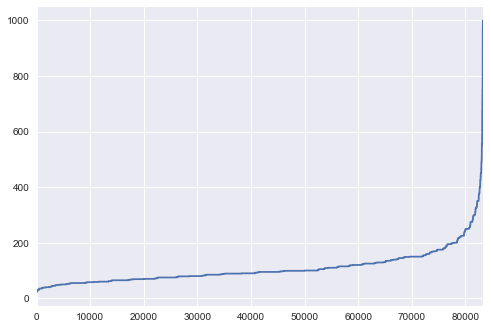

In [17]:
import matplotlib.pyplot as plt
features['price'].sort_values().reset_index(drop=True).plot()
plt.show()

In [18]:
import copy
fitters = copy.deepcopy(features)

In [20]:
#"','".join(fitters.columns).replace(' ','_').replace('/','_').replace('-','_').replace(' ','_')
#Reordering column

fitters.columns = ['neighbourhood_group','neighbourhood','room_type','compound','negativity','neutrality','positivity','minimum_nights','number_of_reviews','reviews_per_month','price','calculated_host_listings_count','availability_365','Beacon_Hill','Capitol_Hill','Cascade','Central_Area','Delridge','Downtown','Interbay','Lake_City','Magnolia','Northgate','Other_neighborhoods','Queen_Anne','Rainier_Valley','Seward_Park','University_District','West_Seattle','Alki','Arbor_Heights','Atlantic','Belltown','Bitter_Lake','Briarcliff','Brighton','Broadview','Broadway','Bryant','Cedar_Park','Central_Business_District','Columbia_City','Crown_Hill','Dunlap','East_Queen_Anne','Eastlake','Fairmount_Park','Fauntleroy','First_Hill','Fremont','Gatewood','Genesee','Georgetown','Green_Lake','Greenwood','Haller_Lake','Harrison_Denny_Blaine','High_Point','Highland_Park','Holly_Park','Industrial_District','Interbay','International_District','Laurelhurst','Lawton_Park','Leschi','Lower_Queen_Anne','Loyal_Heights','Madison_Park','Madrona','Mann','Maple_Leaf','Matthews_Beach','Meadowbrook','Mid_Beacon_Hill','Minor','Montlake','Mount_Baker','North_Admiral','North_Beach_Blue_Ridge','North_Beacon_Hill','North_College_Park','North_Delridge','North_Queen_Anne','Olympic_Hills','Phinney_Ridge','Pike_Market','Pinehurst','Pioneer_Square','Portage_Bay','Rainier_Beach','Ravenna','Riverview','Roosevelt','Roxhill','Seaview','Seward_Park','South_Beacon_Hill','South_Delridge','South_Lake_Union','South_Park','Southeast_Magnolia','Stevens','Sunset_Hill','University_District','Victory_Heights','View_Ridge','Wallingford','Wedgwood','West_Queen_Anne','West_Woodland','Westlake','Whittier_Heights','Windermere','Yesler_Terrace','Private_room','Shared_room']

cols=fitters.columns.tolist()

cols=[cols[10]]+cols[3:9]+cols[11:]

fitters=fitters[cols]

In [21]:
#Removed Columns with near-zero variance

from sklearn.feature_selection import VarianceThreshold 

selector = VarianceThreshold()

pd.DataFrame(selector.fit_transform(fitters))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118
0,85.0,0.8997,0.081,0.550,0.368,1.0,207.0,2.0,346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,85.0,0.9859,0.000,0.740,0.260,1.0,207.0,2.0,346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,85.0,0.9798,0.069,0.661,0.270,1.0,207.0,2.0,346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,85.0,0.9834,0.021,0.683,0.296,1.0,207.0,2.0,346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,85.0,0.9883,0.000,0.733,0.267,1.0,207.0,2.0,346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,85.0,0.9903,0.062,0.673,0.265,1.0,207.0,2.0,346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,85.0,0.9081,0.000,0.749,0.251,1.0,207.0,2.0,346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,85.0,0.9793,0.000,0.583,0.417,1.0,207.0,2.0,346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [22]:
import copy
fitters1=copy.deepcopy(fitters)
col_corr = set() # Set of all the names of deleted columns
corr_matrix = fitters1.corr()
for i in range(len(corr_matrix.columns)):
	for j in range(i):
		if corr_matrix.iloc[i, j] >= 0.9:
			colname = corr_matrix.columns[i] # getting the name of column
			col_corr.add(colname)
			if colname in fitters1.columns:
				del fitters1[colname] # deleting the column from the tr_copy
                
#removed 13 features whic were highly collinear
display(len(fitters.columns) -len(fitters1.columns))

fitters=fitters1


13

In [23]:
#removed outlier prices
fitters=fitters1[~(np.abs(fitters1['price']-fitters1['price'].mean())>(3*fitters1['price'].std()))]

In [86]:
fitters.head()



,price,compound,negativity,neutrality,positivity,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Beacon_Hill,Capitol_Hill,Cascade,Central_Area,Delridge,Downtown,Lake_City,Magnolia,Northgate,Other_neighborhoods,Queen_Anne,Rainier_Valley,West_Seattle,Alki,Arbor_Heights,Atlantic,Belltown,Bitter_Lake,Briarcliff,Brighton,Broadview,Broadway,Bryant,Cedar_Park,Central_Business_District,Columbia_City,Crown_Hill,Dunlap,East_Queen_Anne,Fairmount_Park,Fauntleroy,First_Hill,Fremont,Gatewood,Genesee,Georgetown,Green_Lake,Greenwood,Haller_Lake,Harrison_Denny_Blaine,High_Point,Highland_Park,Holly_Park,Industrial_District,International_District,Laurelhurst,Lawton_Park,Leschi,Lower_Queen_Anne,Loyal_Heights,Madison_Park,Madrona,Mann,Maple_Leaf,Matthews_Beach,Meadowbrook,Mid_Beacon_Hill,Minor,Montlake,Mount_Baker,North_Admiral,North_Beach_Blue_Ridge,North_Beacon_Hill,North_College_Park,North_Delridge,North_Queen_Anne,Olympic_Hills,Phinney_Ridge,Pike_Market,Pinehurst,Pioneer_Square,Portage_Bay,Rainier_Beach,Ravenna,Riverview,Roosevelt,Roxhill,Seaview,South_Beacon_Hill,South_Delridge,South_Lake_Union,South_Park,Southeast_Magnolia,Stevens,Sunset_Hill,Victory_Heights,View_Ridge,Wallingford,Wedgwood,West_Queen_Anne,West_Woodland,Westlake,Whittier_Heights,Windermere,Yesler_Terrace,Private_room,Shared_room
0,85,0.8997,0.081,0.550,0.368,1,207,2,346,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,85,0.9859,0.000,0.740,0.260,1,207,2,346,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,85,0.9798,0.069,0.661,0.270,1,207,2,346,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,85,0.9834,0.021,0.683,0.296,1,207,2,346,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,85,0.9883,0.000,0.733,0.267,1,207,2,346,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [76]:
#creating two datasets
fitters_wo_txt=fitters.iloc[:,5:] 
fitters_w_txt=fitters.iloc[:,1:]


In [62]:
fitters_wo_txt.head(1)

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Beacon_Hill,Capitol_Hill,Cascade,Central_Area,Delridge,Downtown,Lake_City,Magnolia,Northgate,Other_neighborhoods,Queen_Anne,Rainier_Valley,West_Seattle,Alki,Arbor_Heights,Atlantic,Belltown,Bitter_Lake,Briarcliff,Brighton,Broadview,Broadway,Bryant,Cedar_Park,Central_Business_District,Columbia_City,Crown_Hill,Dunlap,East_Queen_Anne,Fairmount_Park,Fauntleroy,First_Hill,Fremont,Gatewood,Genesee,Georgetown,Green_Lake,Greenwood,Haller_Lake,Harrison_Denny_Blaine,High_Point,Highland_Park,Holly_Park,Industrial_District,International_District,Laurelhurst,Lawton_Park,Leschi,Lower_Queen_Anne,Loyal_Heights,Madison_Park,Madrona,Mann,Maple_Leaf,Matthews_Beach,Meadowbrook,Mid_Beacon_Hill,Minor,Montlake,Mount_Baker,North_Admiral,North_Beach_Blue_Ridge,North_Beacon_Hill,North_College_Park,North_Delridge,North_Queen_Anne,Olympic_Hills,Phinney_Ridge,Pike_Market,Pinehurst,Pioneer_Square,Portage_Bay,Rainier_Beach,Ravenna,Riverview,Roosevelt,Roxhill,Seaview,South_Beacon_Hill,South_Delridge,South_Lake_Union,South_Park,Southeast_Magnolia,Stevens,Sunset_Hill,Victory_Heights,View_Ridge,Wallingford,Wedgwood,West_Queen_Anne,West_Woodland,Westlake,Whittier_Heights,Windermere,Yesler_Terrace,Private_room,Shared_room
0,1,207,2,346,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
#####
#Model Preparation using Scikit-Learn
#####
from sklearn.linear_model import LinearRegression
import sklearn.metrics
import math



clf1 = LinearRegression()
clf2 = LinearRegression()

y = fitters['price']
clf1.fit(fitters_wo_txt, y)
clf2.fit(fitters_w_txt, y)

y_pred_wo = clf1.predict(fitters_wo_txt)
y_pred_w = clf2.predict(fitters_w_txt)

# pd.DataFrame({'y':y, 'y_pred_wo':y_pred_wo,'y_pred_w':y_pred_w})

mse1 = sklearn.metrics.mean_squared_error(y, y_pred_wo)
mse2 = sklearn.metrics.mean_squared_error(y, y_pred_w)
display(pd.DataFrame({'rmse_wo':math.sqrt(mse1), 'rmse_w':math.sqrt(mse2)},index=np.arange(1)))

r_squared_wo = sklearn.metrics.r2_score(y, y_pred_wo)
r_squared_w = sklearn.metrics.r2_score(y, y_pred_w)

# explained_variance_wo = sklearn.metrics.explained_variance(y, y_pred_wo)
# explained_variance_w = sklearn.metrics.explained_variance(y, y_pred_w)


display(pd.DataFrame({'Rsq_wo':r_squared_wo, 'Rsq_w':r_squared_w},index=np.arange(1)))

,rmse_w,rmse_wo
0,36.805491,36.805882


,Rsq_w,Rsq_wo
0,0.403243,0.40323


In [ ]:
full_fitters_wo_txt[full_fitters_wo_txt.columns.difference(["Bryant","Haller_Lake","Greenwood","Pike_Market","Harrison_Denny_Blaine","Northgate","Olympic_Hills","Laurelhurst","Whittier_Heights","Roxhill","Leschi","Pinehurst","North_College_Park","High_Point","Georgetown","Other_neighborhoods","Dunlap","Rainier_Beach","Central_Business_District","Windermere","Crown_Hill","First_Hill","Seaview","Loyal_Heights","Mount_Baker","Westlake","South_Park","Montlake","Fairmount_Park","Brighton","Highland_Park","Riverview","Stevens","Atlantic","Southeast_Magnolia","Roosevelt","Beacon_Hill"])]

In [77]:
#####
#Model Preparation using Statsmodel
#####

import statsmodels.api as sm
import statsmodels.formula.api as smf

##selection
full_fitters_wo_txt = fitters_wo_txt[fitters_wo_txt.columns.difference(["Bryant","Haller_Lake","Greenwood","Pike_Market","Harrison_Denny_Blaine","Northgate","Olympic_Hills","Laurelhurst","Whittier_Heights","Roxhill","Leschi","Pinehurst","North_College_Park","High_Point","Georgetown","Other_neighborhoods","Dunlap","Rainier_Beach","Central_Business_District","Windermere","Crown_Hill","First_Hill","Seaview","Loyal_Heights","Mount_Baker","Westlake","South_Park","Montlake","Fairmount_Park","Brighton","Highland_Park","Riverview","Stevens","Atlantic","Southeast_Magnolia","Roosevelt","Beacon_Hill"])]

full_fitters_w_txt = fitters_w_txt[fitters_w_txt.columns.difference(["Bryant","Haller_Lake","Greenwood","Pike_Market","Intercept","Harrison_Denny_Blaine","Northgate","Olympic_Hills","Laurelhurst","Whittier_Heights","Roxhill","Leschi","Pinehurst","North_College_Park","High_Point","Georgetown","Other_neighborhoods","Dunlap","Rainier_Beach","Central_Business_District","Windermere","Crown_Hill","First_Hill","Seaview"])]

##

y = fitters['price']
full_fitters_wo_txt = pd.concat([y, full_fitters_wo_txt], axis=1)
full_fitters_w_txt = pd.concat([y, full_fitters_w_txt], axis=1)



all_columns1 = "+".join(full_fitters_wo_txt.columns).replace('price+','')
all_columns2 = "+".join(full_fitters_w_txt.columns).replace('price+','')

my_formula1 ="price~"+ all_columns1
results1 = smf.ols(my_formula1
                  , data=full_fitters_wo_txt).fit()



my_formula2 ="price~"+ all_columns2
results2 = smf.ols(my_formula2
                  , data=full_fitters_w_txt).fit()

In [78]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     875.2
Date:                Wed, 21 Feb 2018   Prob (F-statistic):               0.00
Time:                        00:39:27   Log-Likelihood:            -4.1137e+05
No. Observations:               81863   AIC:                         8.229e+05
Df Residuals:                   81799   BIC:                         8.235e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [85]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     708.1
Date:                Wed, 21 Feb 2018   Prob (F-statistic):               0.00
Time:                        11:33:17   Log-Likelihood:            -4.1134e+05
No. Observations:               81863   AIC:                         8.228e+05
Df Residuals:                   81784   BIC:                         8.236e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

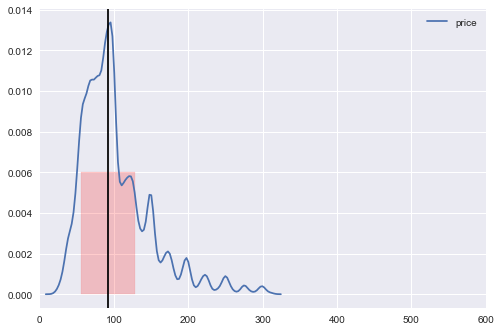

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
sns.kdeplot(y)
ax = plt.gca()
ax.set_xlim([0, 600])
plt.axvline(y.median(), c='black')
ax.add_patch(
    patches.Rectangle((y.median() - math.sqrt(mse1), 0), 2*math.sqrt(mse1), 0.006,
                      color='r', alpha=0.2)
)
plt.show()

In [ ]:
r_squared_wo = sklearn.metrics.r2_score(y, y_pred_wo)
r_squared_w = sklearn.metrics.r2_score(y, y_pred_w)

# explained_variance_wo = sklearn.metrics.explained_variance(y, y_pred_wo)
# explained_variance_w = sklearn.metrics.explained_variance(y, y_pred_w)


pd.DataFrame({'Rsq_wo':r_squared_wo, 'Rsq_w':r_squared_w},index=np.arange(1))

In [ ]:
SS_Residual1 = sum((y-y_pred_wo)**2)
SS_Total1 = sum((y-np.mean(y))**2)
r_squared1 = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared1 = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

SS_Residual2 = sum((y-y_pred_w)**2)
SS_Total2 = sum((y-np.mean(y))**2)
r_squared2 = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared2 = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [82]:
coefs1 = list(zip(clf1.coef_, fitters.drop('price', axis='columns')))

coefs2 = list(zip(clf2.coef_, fitters.drop('price', axis='columns')))


In [83]:
neighborhoods = np.unique(joined_table['neighbourhood_group'])
neighborhood_effects1 = [v for v in coefs1 if v[1] in neighborhoods]
neighborhood_effects2 = [v for v in coefs2 if v[1] in neighborhoods]

In [ ]:
neighborhood_effects1

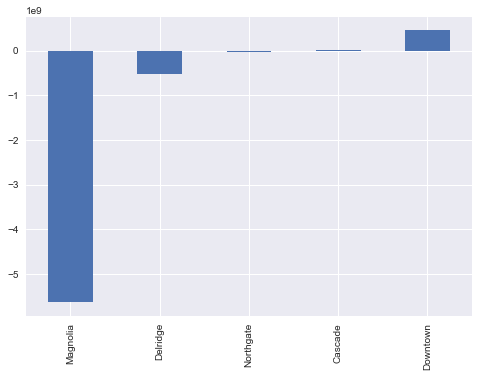

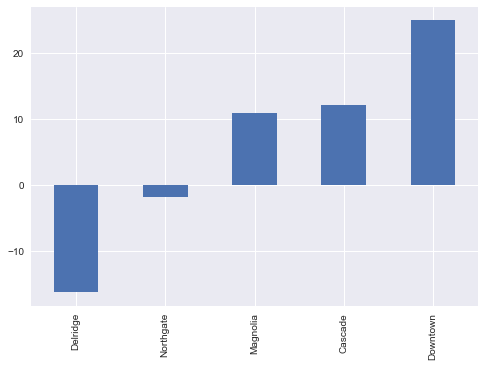

In [84]:
pd.Series(data=[n[0] for n in neighborhood_effects1],
          index=[n[1] for n in neighborhood_effects1])\
    .sort_values()\
    .plot(kind='bar')
plt.show()
    
pd.Series(data=[n[0] for n in neighborhood_effects2],
          index=[n[1] for n in neighborhood_effects2])\
    .sort_values()\
    .plot(kind='bar')
    
plt.show()